# Predicting Breast Cancer - Logistic Regression

## Object :
Predict whether the cancer is benign or malignant

--

### import and understand data

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a)- radius (mean of distances from center to points on the perimeter)

b)- texture (standard deviation of gray-scale values)

c)- perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df=pd.read_csv("DataBM.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [135]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [136]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [138]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [139]:
df.shape

(569, 33)

### Data Cleaning 

#### Dealing with missing values 

In [140]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [141]:
df.drop("Unnamed: 32", axis=1, inplace=True)


In [142]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [143]:
df.isnull().sum().sum()

0

#### Remove Duplicate values

In [144]:
df.duplicated().sum()

0

### Exploratory Data

In [145]:
count= df['diagnosis'].value_counts()
count

diagnosis
B    357
M    212
Name: count, dtype: int64

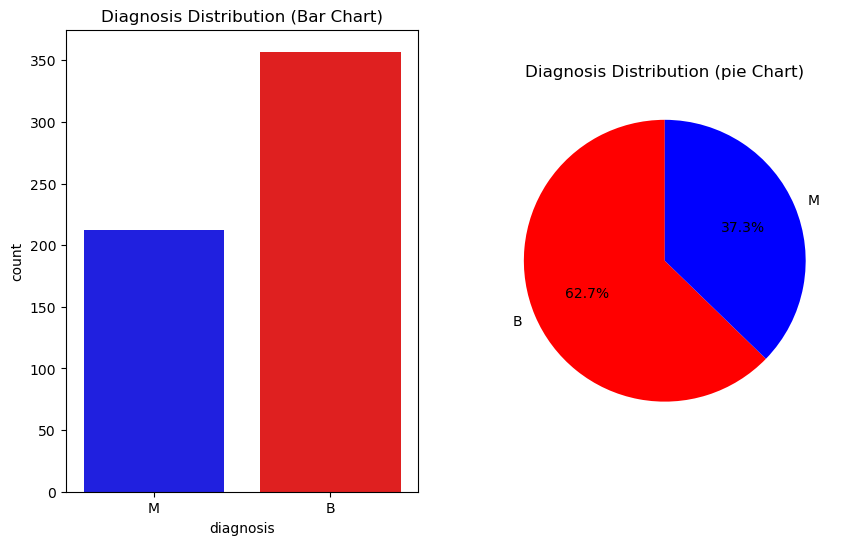

In [146]:
# diagnosis
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x="diagnosis",data=df,palette=["b", "r"])
plt.xlabel("diagnosis")
plt.ylabel("count")
plt.title("Diagnosis Distribution (Bar Chart)")

plt.subplot(1,2,2)
plt.pie(count,labels=["B","M"],colors=["r","b"],autopct="%1.1f%%",startangle=90)
plt.title("Diagnosis Distribution (pie Chart)")
plt.show()

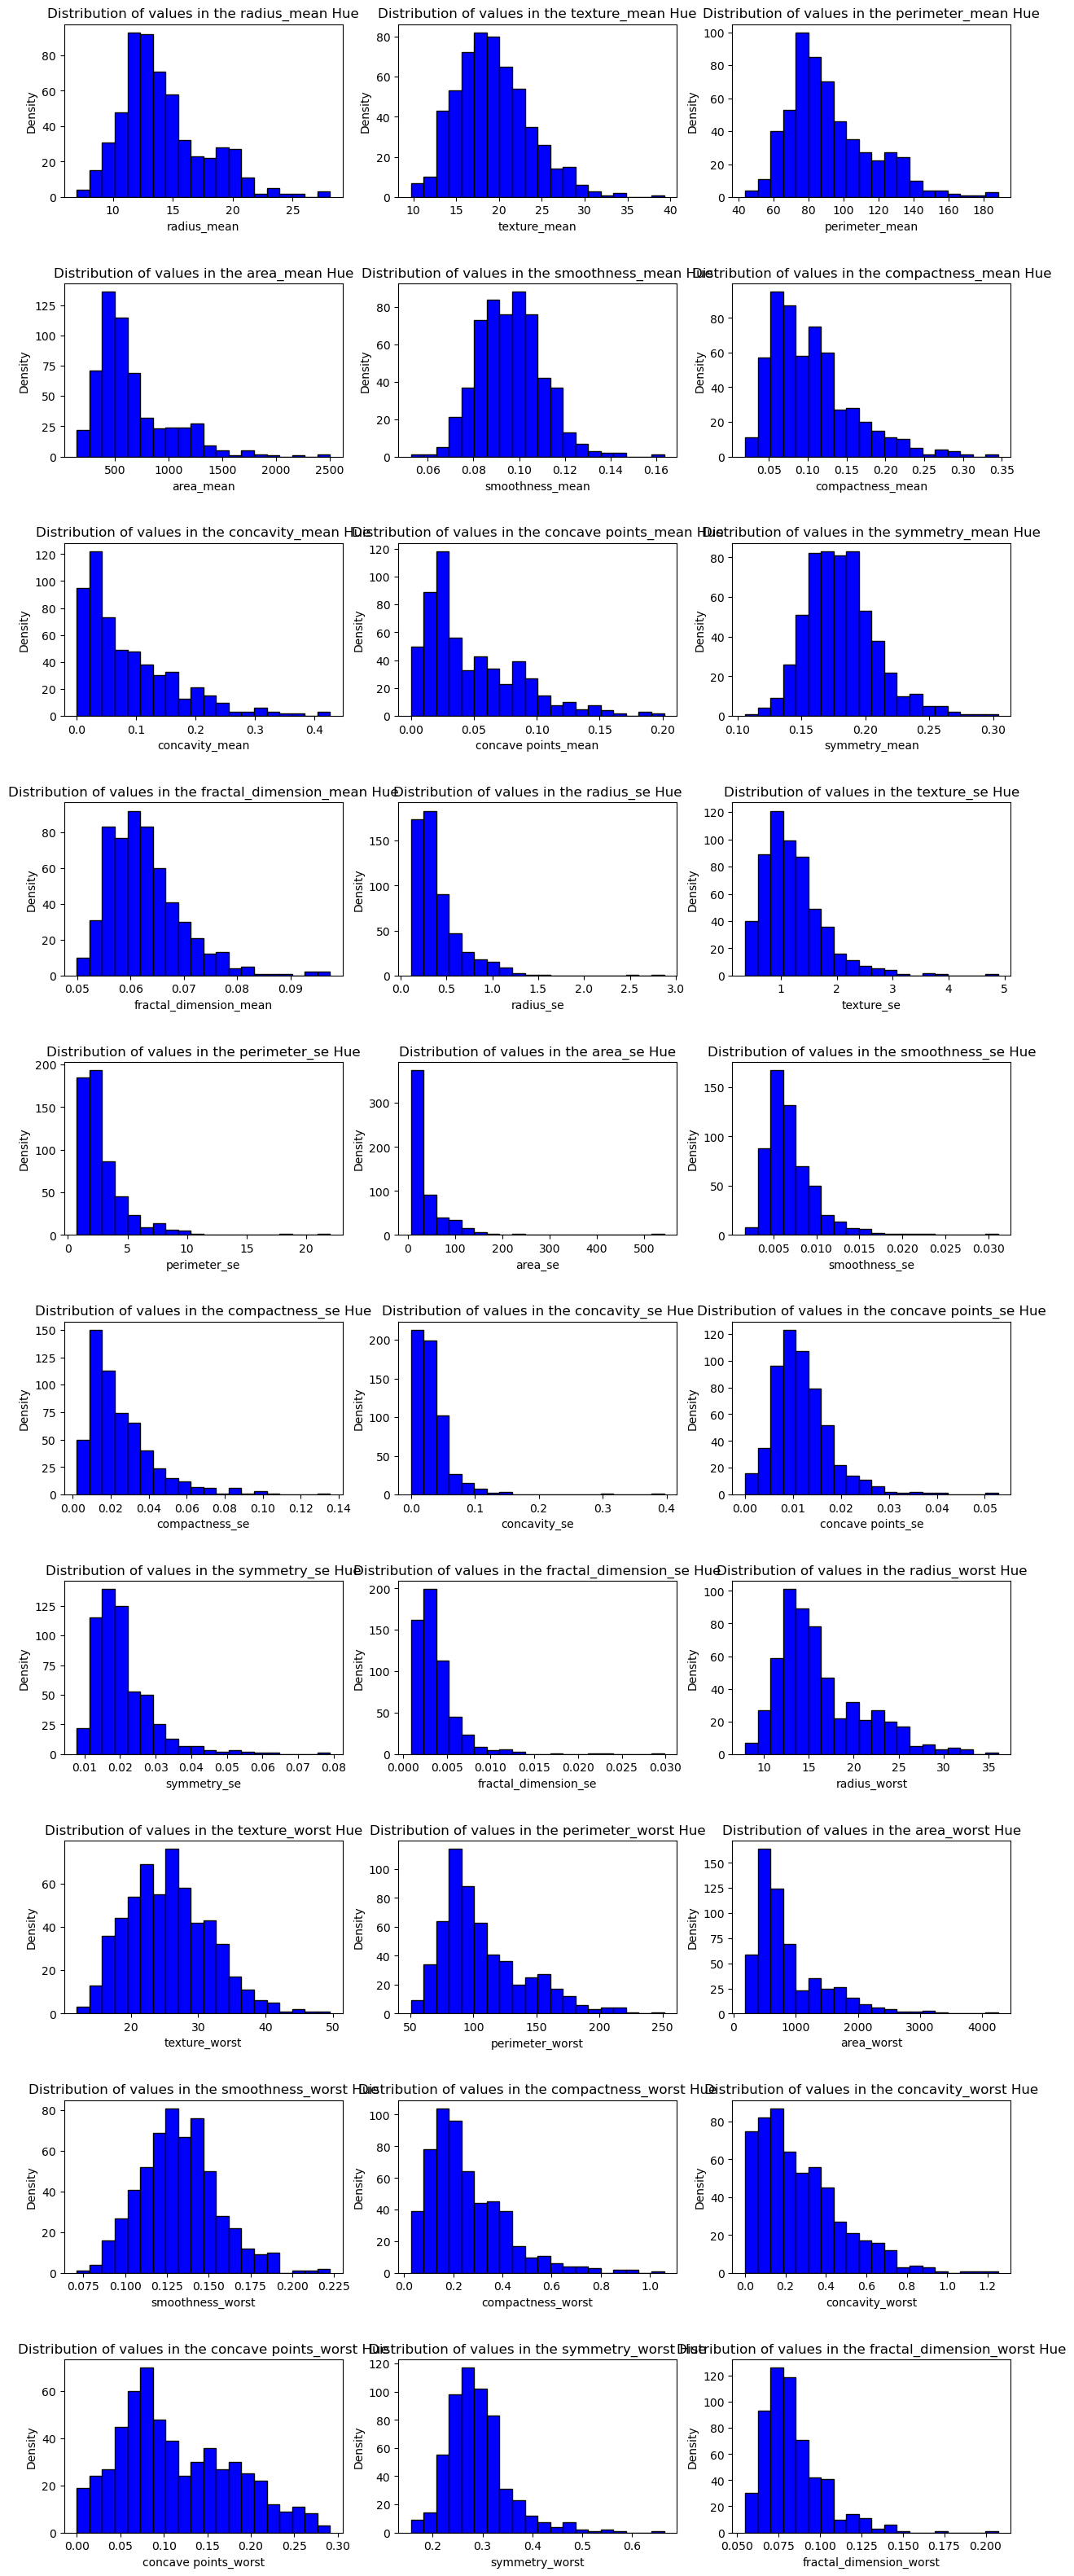

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to view
columns_to_visualize = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Number of columns to display per row in subplots
columns_per_row = 3

# Calculating the total number of lines needed
total_rows = (len(columns_to_visualize) - 1) // columns_per_row + 1

# Creation of subplots
fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(15, 4 * total_rows))

# Adjusting the spacing between sub-plots
fig.subplots_adjust(hspace=0.5)

# Iteration on each column and creation of the Histogram
for i, column in enumerate(columns_to_visualize):
    row = i // columns_per_row
    col = i % columns_per_row
    axes[row, col].hist(df[column], bins=20, color='blue', edgecolor='black')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')
    axes[row, col].set_title(f'Distribution of values in the {column} Hue')

# Display of subplots
plt.show()


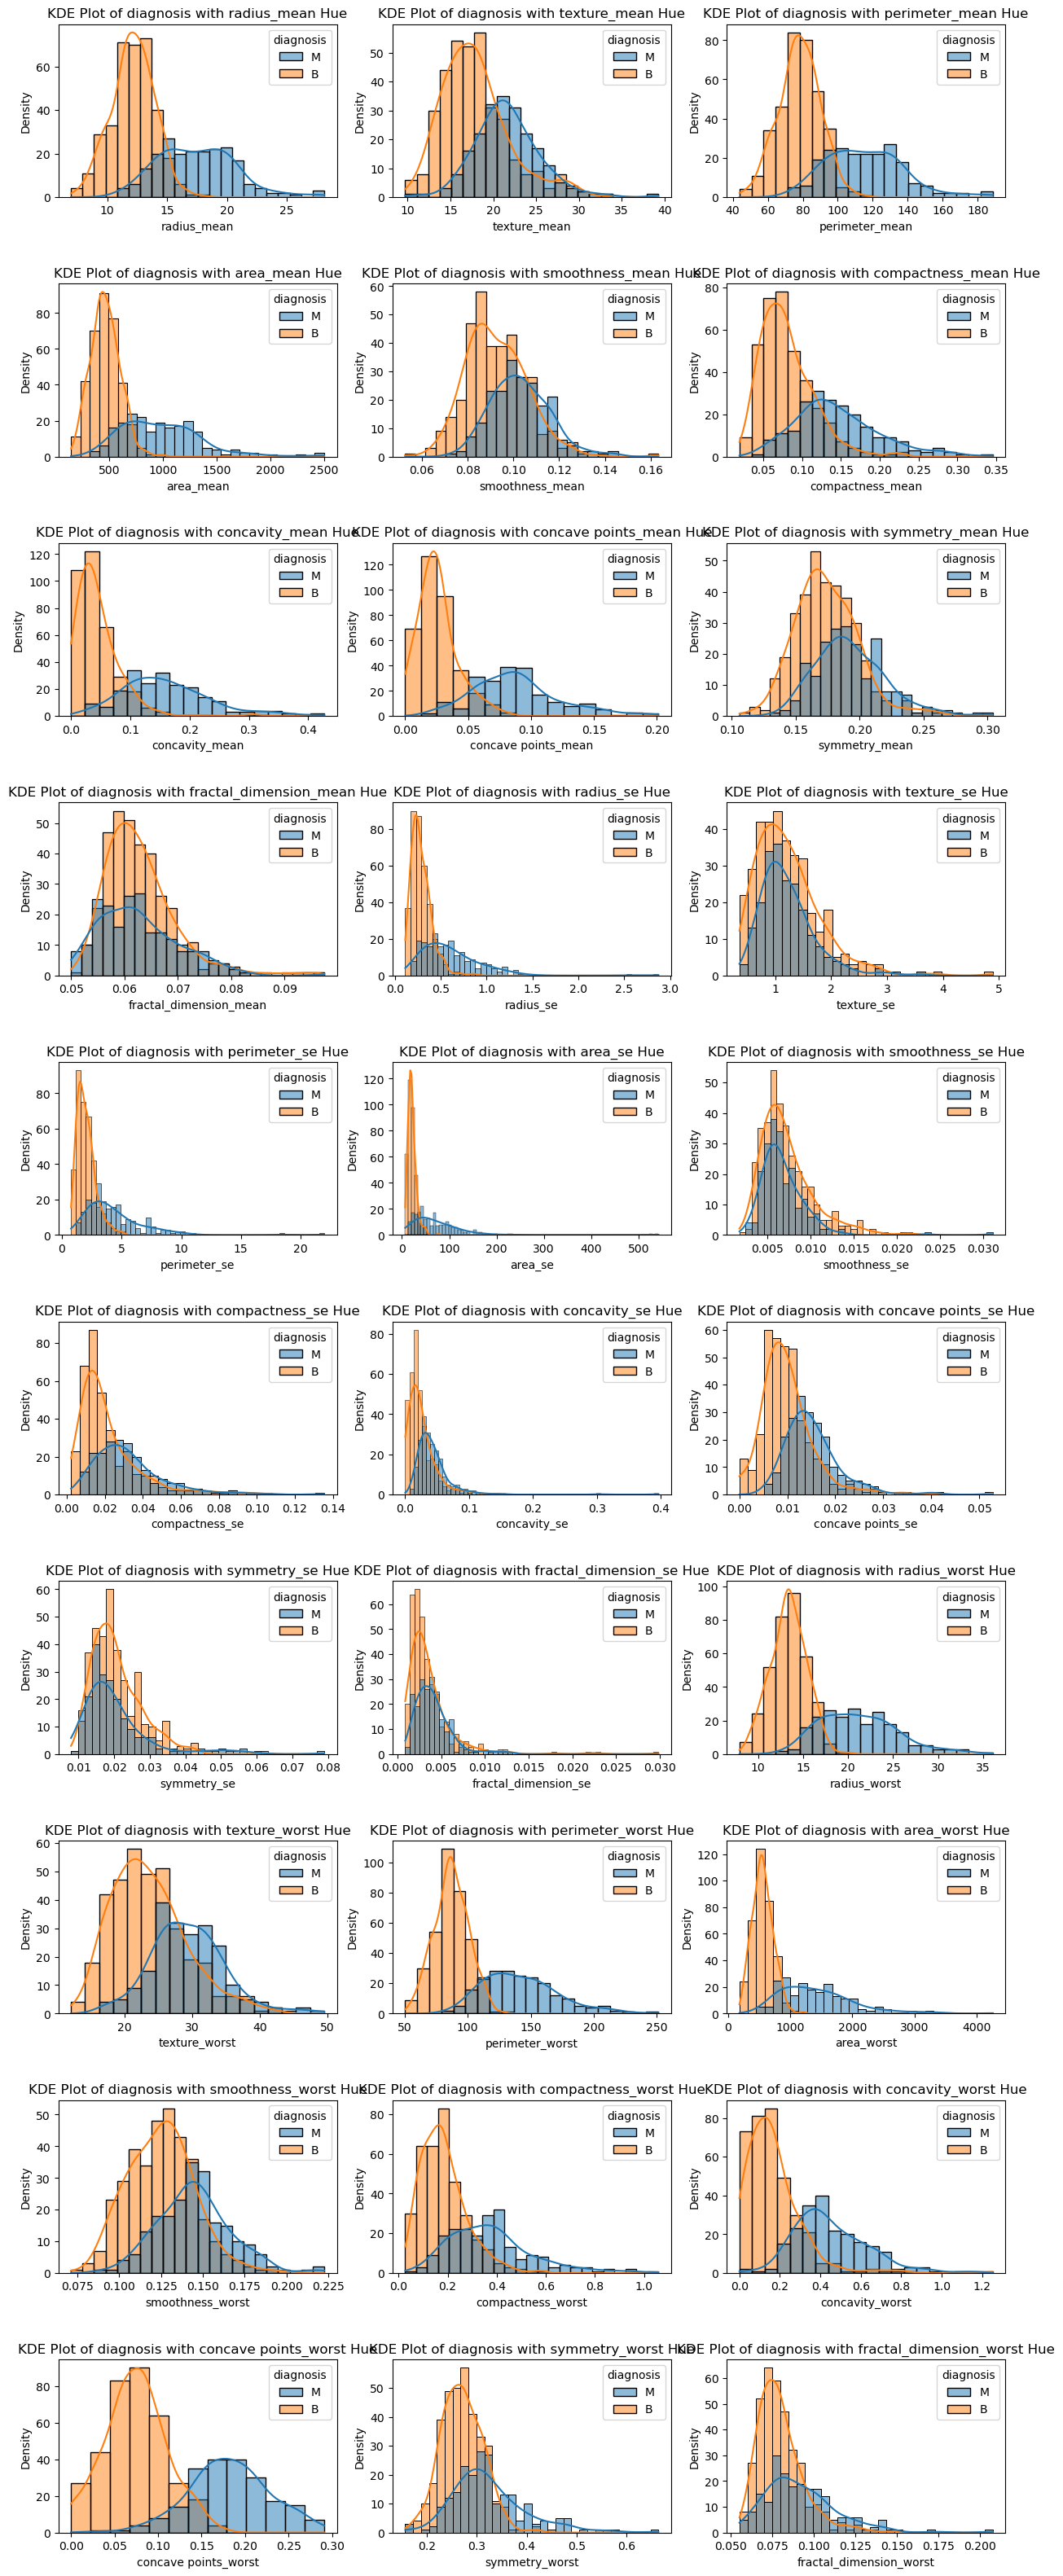

In [148]:
columns_per_row = 3
total_rows = (len(columns_to_visualize) - 1) // columns_per_row + 1
fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(15, 4 * total_rows))
fig.subplots_adjust(hspace=0.5)  
for i, column in enumerate(columns_to_visualize):
    row = i // columns_per_row
    col = i % columns_per_row
    
    sns.histplot(x=column, data=df, hue="diagnosis", kde=True, ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')
    axes[row, col].set_title(f'KDE Plot of diagnosis with {column} Hue')
plt.show()


#### Dealing with Outliers

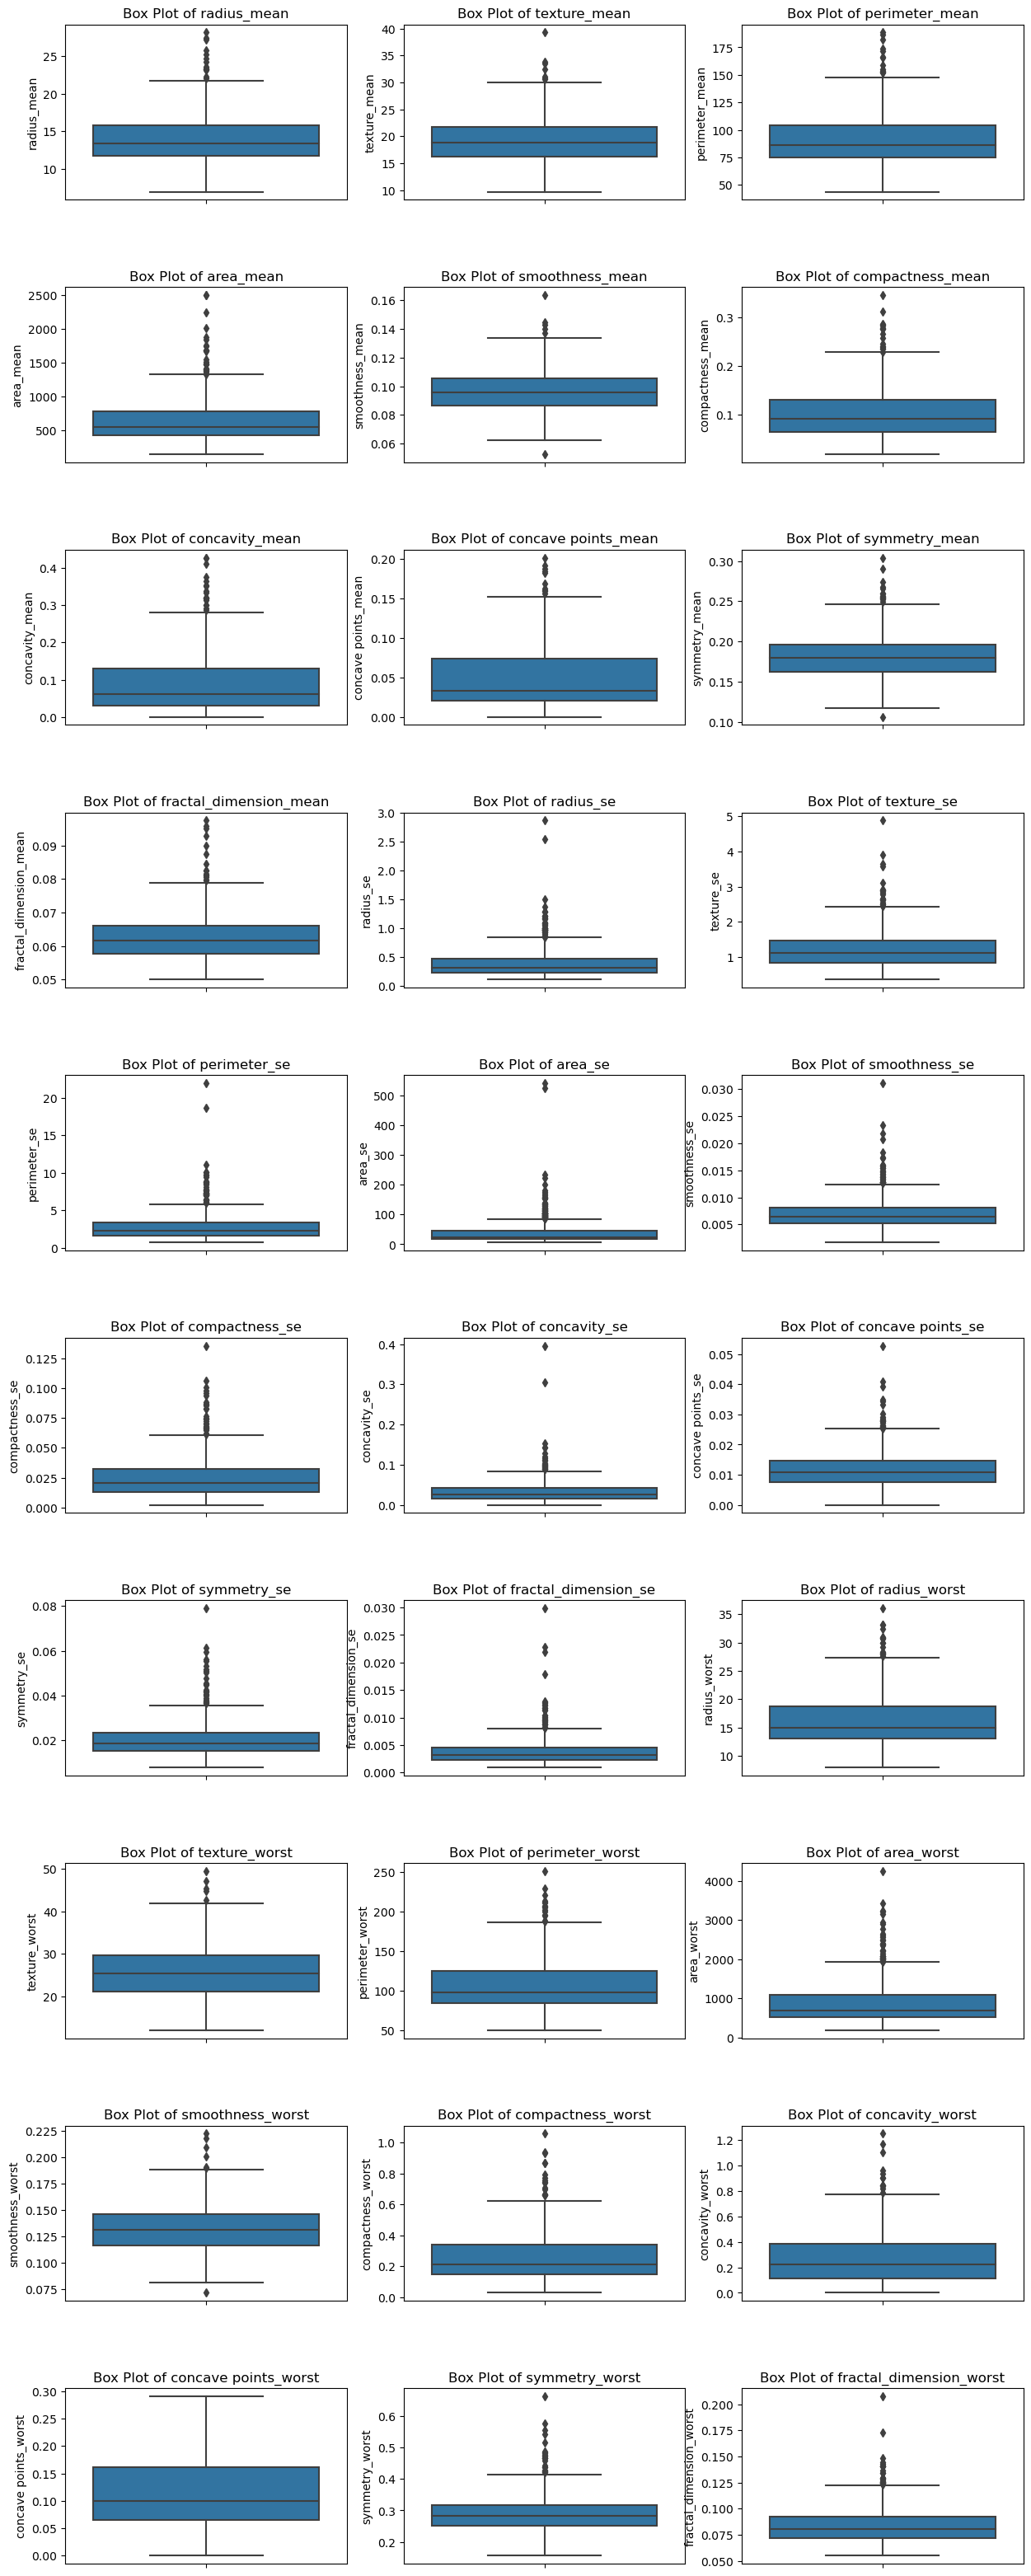

In [149]:
def boxplots(df,columns_to_visualize):
    
 # Number of columns to display per row in subplots
 columns_per_row = 3

 # Calculating the total number of lines needed
 total_rows = (len(columns_to_visualize) - 1) // columns_per_row + 1

 # Création des sous-plots
 fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(15, 4 * total_rows))

 # Adjusting the spacing between sub-plots
 fig.subplots_adjust(hspace=0.5)  # Adjust the value as needed

 # Iteration on each column and creation of the box plot
 for i, column in enumerate(columns_to_visualize):
    row = i // columns_per_row
    col = i % columns_per_row
    
    sns.boxplot(y=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')

 # Display of subplots
 plt.show()
boxplots(df,columns_to_visualize)

In [150]:
columns= [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 
    'symmetry_worst', 'fractal_dimension_worst'
]
def dealingOutliers(data,columns):
    for item in columns:
        Q1=data[item].quantile(0.25) 
        Q3=data[item].quantile(0.75)
        IQR =Q3-Q1 
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        data[item]=data[item].apply(lambda x: lower_bound if x<lower_bound else ( upper_bound if x> upper_bound else x))
        
dealingOutliers(df,columns)

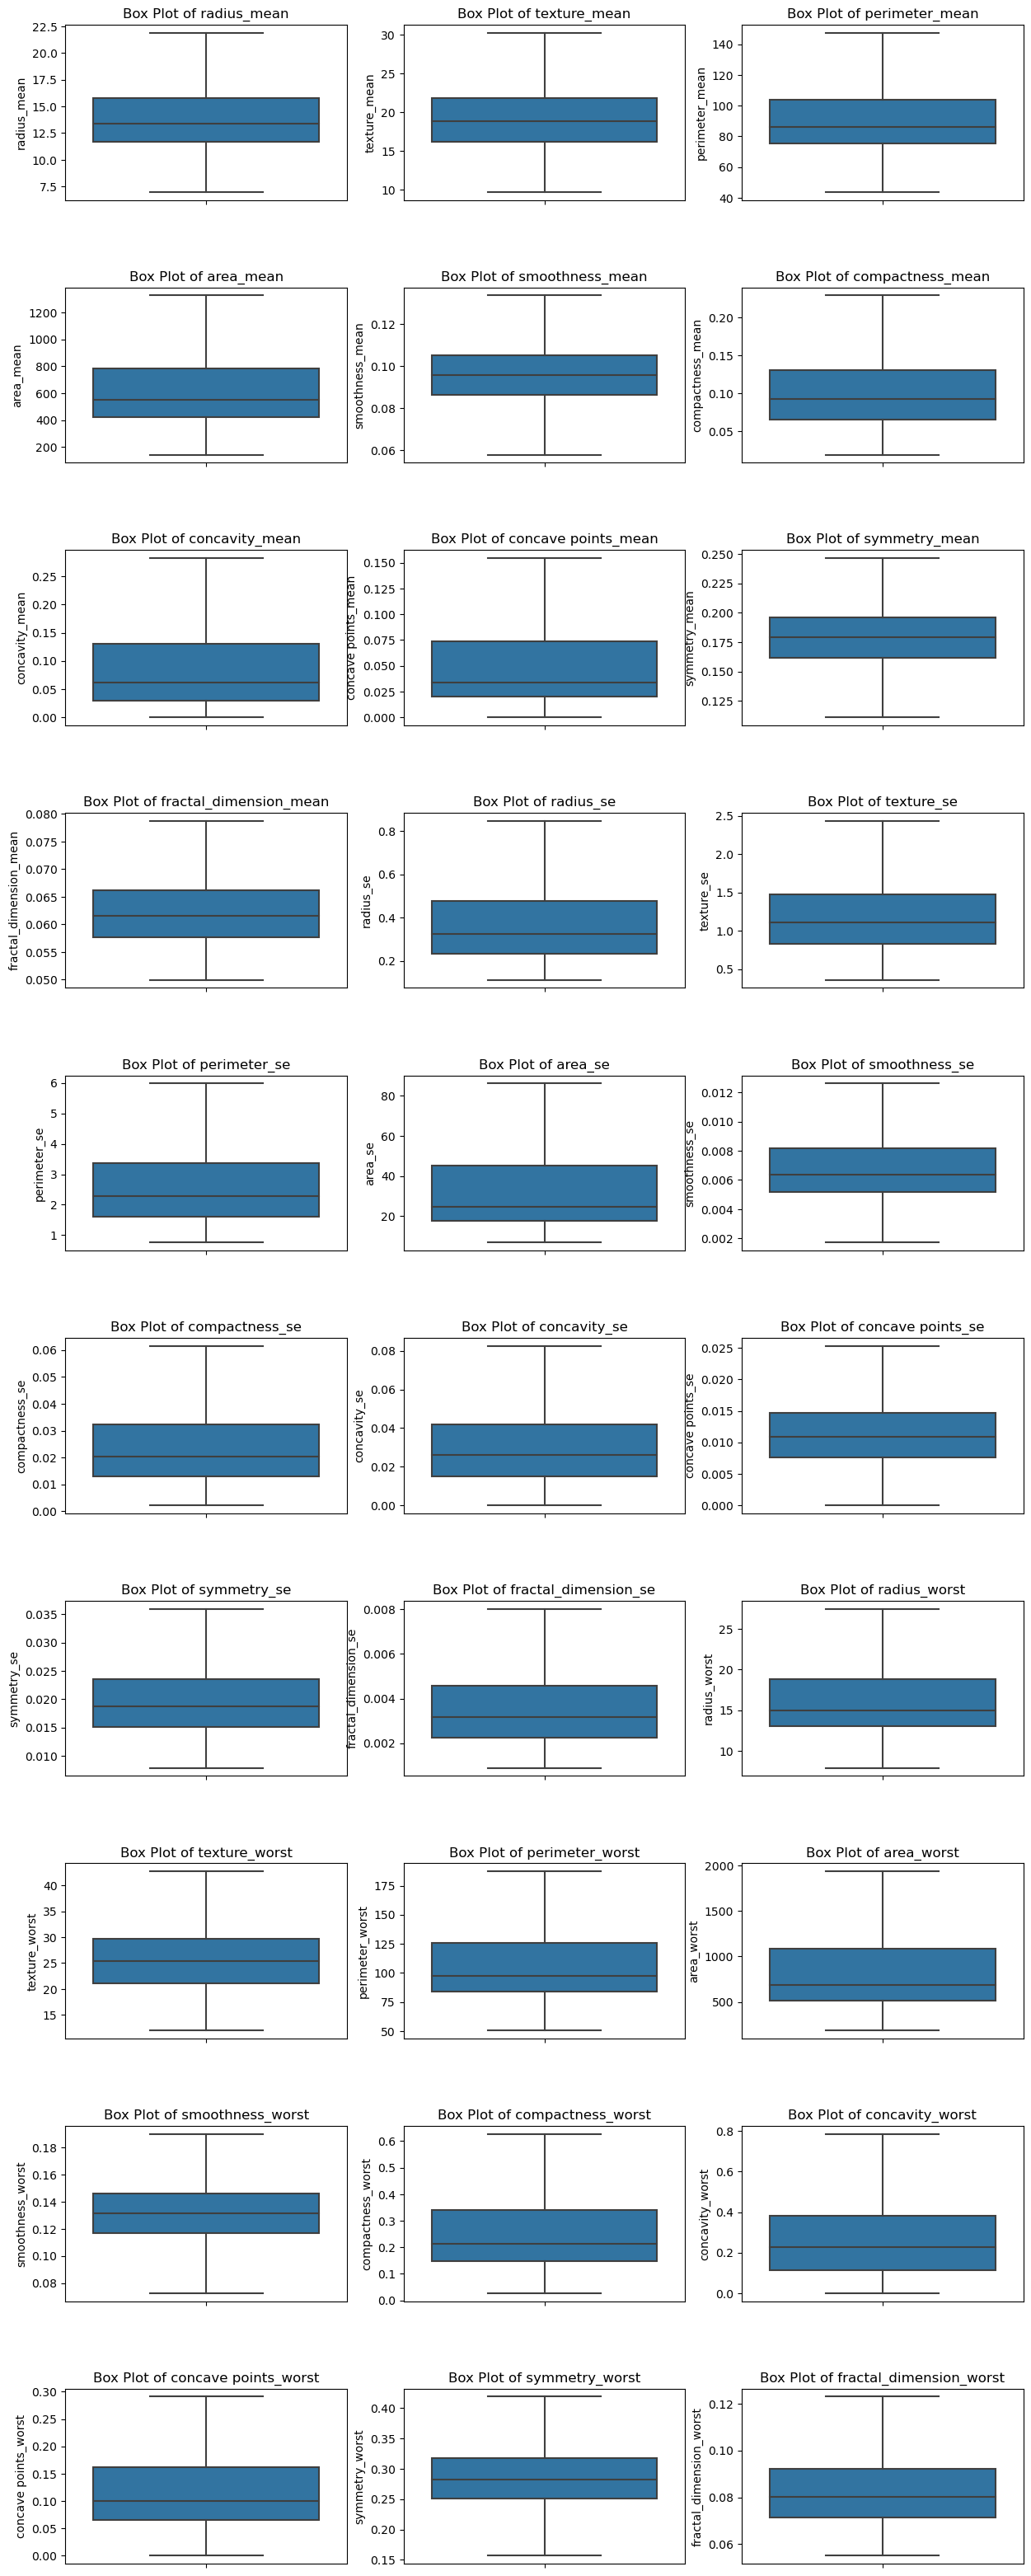

In [151]:
boxplots(df,columns_to_visualize)

#### change categorical

In [152]:
df['diagnosis']=df['diagnosis'].apply(lambda x : 1 if x=="B" else 0)

In [153]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [154]:
df.drop("id",axis=1,inplace=True)

In [155]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,0,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,0,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,0,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


#### Correlation 

In [156]:
from scipy import stats
cols = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]
def correlation(df,columns):
    T={}
    for item in columns:
        pearson_coef,p_value = stats.pearsonr(df[item],df['diagnosis'])
        T[item]={"pearson_coef": pearson_coef,"p_value":p_value} 
    return T
corr=correlation(df,cols)
corr

{'radius_mean': {'pearson_coef': -0.7452170665362838,
  'p_value': 7.339631894720727e-102},
 'texture_mean': {'pearson_coef': -0.4191226458624756,
  'p_value': 1.3022534034950456e-25},
 'perimeter_mean': {'pearson_coef': -0.7590057052299437,
  'p_value': 9.469647840179944e-108},
 'area_mean': {'pearson_coef': -0.7527857470529002,
  'p_value': 4.7991808108757916e-105},
 'smoothness_mean': {'pearson_coef': -0.36693071002017996,
  'p_value': 1.416313774007767e-19},
 'compactness_mean': {'pearson_coef': -0.6084943441178484,
  'p_value': 6.318084542540472e-59},
 'concavity_mean': {'pearson_coef': -0.7271682646342106,
  'p_value': 1.0549156351043282e-94},
 'concave points_mean': {'pearson_coef': -0.7880986485779081,
  'p_value': 1.3797699319831864e-121},
 'symmetry_mean': {'pearson_coef': -0.33453610257918465,
  'p_value': 2.4076741963842313e-16},
 'fractal_dimension_mean': {'pearson_coef': 0.006801301587631528,
  'p_value': 0.8713992073289696},
 'radius_se': {'pearson_coef': -0.642398574080

In [157]:
def filter(df,columns) :
    T=[]
    for item in columns:
            if corr[item]["p_value"] > 0.1:
                T.append(item)
                print(f" no correlation with  {item}")
                
    return T
        
nocorr=filter(df,cols)
nocorr

 no correlation with  fractal_dimension_mean
 no correlation with  texture_se


['fractal_dimension_mean', 'texture_se']

In [158]:
new_df=df.drop(nocorr,axis=1)

In [159]:
new_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


### Building Model

In [160]:
# transform data at the same scale 
from sklearn.preprocessing import MinMaxScaler
cols= [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 
    'radius_se',  'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]
scaler = MinMaxScaler()
def scale(df,cols):
    for item in cols:
        df[item]= scaler.fit_transform(df[[item]])
scale(new_df,cols)

In [161]:
new_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,0.737918,0.032627,0.761873,0.724975,0.798006,1.000000,1.000000,0.951888,0.966716,...,0.893497,0.173190,0.980026,1.000000,0.762755,1.000000,0.906302,0.912027,1.000000,0.939532
1,0,0.910852,0.392501,0.859264,0.999746,0.353473,0.283215,0.307709,0.454072,0.517751,...,0.873528,0.371494,0.791601,1.000000,0.436224,0.265667,0.307575,0.639175,0.451171,0.499926
2,0,0.851867,0.561967,0.831300,0.895756,0.681788,0.671573,0.698984,0.827644,0.707840,...,0.800819,0.440639,0.745591,0.869823,0.611395,0.662392,0.573393,0.835052,0.779745,0.478741
3,0,0.297540,0.519601,0.325828,0.205107,1.000000,1.000000,0.854786,0.680752,1.000000,...,0.357399,0.472277,0.353916,0.218341,1.000000,1.000000,0.874475,0.884880,1.000000,1.000000
4,0,0.892084,0.225469,0.880478,0.975228,0.558967,0.542057,0.701108,0.674928,0.515533,...,0.748080,0.151663,0.743400,0.793333,0.551871,0.296351,0.509230,0.558419,0.304207,0.319847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,0.977210,0.617482,0.947013,1.000000,0.700277,0.461288,0.863638,0.898826,0.454142,...,0.897081,0.469015,0.844915,1.000000,0.582483,0.306857,0.522852,0.761512,0.188464,0.237016
565,0,0.881359,0.902849,0.842872,0.944792,0.525951,0.401548,0.509897,0.633578,0.473373,...,0.806964,0.855512,0.763849,0.882381,0.375000,0.275006,0.409293,0.559450,0.383400,0.166691
566,0,0.644748,0.894570,0.622053,0.604160,0.350964,0.396291,0.327573,0.343094,0.353550,...,0.565796,0.720809,0.557166,0.535891,0.352041,0.470450,0.433227,0.487285,0.248620,0.340739
567,0,0.912863,0.955442,0.928692,0.948174,0.790082,1.000000,1.000000,0.983596,0.950444,...,0.911930,0.893673,0.980026,0.933756,0.786565,1.000000,1.000000,0.910653,0.960213,1.000000


#### train/test split 

In [162]:
from sklearn.model_selection import train_test_split
x=new_df.drop("diagnosis",axis=1)
y=new_df['diagnosis']
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.737918,0.032627,0.761873,0.724975,0.798006,1.000000,1.000000,0.951888,0.966716,1.000000,...,0.893497,0.173190,0.980026,1.000000,0.762755,1.000000,0.906302,0.912027,1.000000,0.939532
1,0.910852,0.392501,0.859264,0.999746,0.353473,0.283215,0.307709,0.454072,0.517751,0.586041,...,0.873528,0.371494,0.791601,1.000000,0.436224,0.265667,0.307575,0.639175,0.451171,0.499926
2,0.851867,0.561967,0.831300,0.895756,0.681788,0.671573,0.698984,0.827644,0.707840,0.860205,...,0.800819,0.440639,0.745591,0.869823,0.611395,0.662392,0.573393,0.835052,0.779745,0.478741
3,0.297540,0.519601,0.325828,0.205107,1.000000,1.000000,0.854786,0.680752,1.000000,0.521061,...,0.357399,0.472277,0.353916,0.218341,1.000000,1.000000,0.874475,0.884880,1.000000,1.000000
4,0.892084,0.225469,0.880478,0.975228,0.558967,0.542057,0.701108,0.674928,0.515533,0.875941,...,0.748080,0.151663,0.743400,0.793333,0.551871,0.296351,0.509230,0.558419,0.304207,0.319847


In [163]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=34)

In [165]:
from sklearn.linear_model import LogisticRegression 
ml = LogisticRegression()

In [166]:
ml.fit(x_train,y_train)

LogisticRegression()

In [167]:
y_pred_logistic= ml.predict(x_test)

In [168]:
from sklearn.metrics import accuracy_score, precision_score,recall_score ,f1_score , confusion_matrix,classification_report

In [169]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)


print("Logistic Regression Accuracy: {:.3f}%".format(accuracy_logistic*100))
print("Logistic Regression Precision: {:.3f}%".format(precision_logistic*100))
print("Logistic Regression Recall: {:.3f}%".format(recall_logistic*100))
print("Logistic Regression F1: {:.3f}%".format(f1_logistic*100))

Logistic Regression Accuracy: 98.246%
Logistic Regression Precision: 97.368%
Logistic Regression Recall: 100.000%
Logistic Regression F1: 98.667%


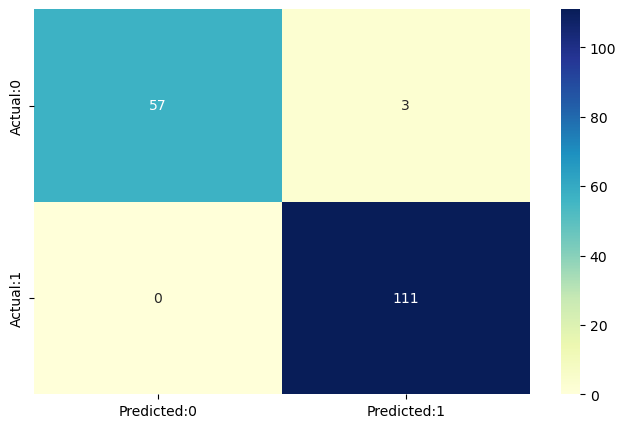

In [171]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_logistic)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()